In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
thyroid_data = pd.read_csv("thyroid_data.csv")
thyroid_data

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2774,82,M,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
3217,2776,79,M,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
3218,2782,50,F,f,f,f,f,f,f,f,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
3219,2786,73,?,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick


In [3]:
thyroid_data = thyroid_data.drop(['S.no'], axis = 1)



In [4]:
thyroid_data

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,41,F,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,23,F,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82,M,f,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
3217,79,M,f,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
3218,50,F,f,f,f,f,f,f,f,t,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
3219,73,?,f,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick


In [5]:
thyroid_data.shape

(3221, 27)

In [6]:
## Columns
thyroid_data.columns

Index(['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [7]:
# A quick fix needed
thyroid_data.loc[thyroid_data['Age'] == '455', 'Age'] = '45'

In [8]:
## Let's drop some unnecessary columns
thyroid_data = thyroid_data.drop(['TSH Measured','T3 Measured','TT4 Measured','T4U Measured','FTI Measured',],axis=1)


In [49]:
## Columns
thyroid_data.columns

Index(['Age', 'FTI', 'Goitre', 'Hypopituitary', 'I131 Treatment', 'Lithium',
       'On Antithyroid Medication', 'On Thyroxine', 'Pregnant', 'Psych',
       'Query Hyperthyroid', 'Query Hypothyroid', 'Query on Thyroxine', 'Sex',
       'Sick', 'T3', 'T4U', 'TSH', 'TT4', 'Thyroid Surgery', 'Tumor',
       'Category'],
      dtype='object')

In [9]:
#Checking for null values
thyroid_data.isna().sum()

Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Category                     0
dtype: int64

In [10]:
thyroid_data.dtypes

Age                          object
Sex                          object
On Thyroxine                 object
Query on Thyroxine           object
On Antithyroid Medication    object
Sick                         object
Pregnant                     object
Thyroid Surgery              object
I131 Treatment               object
Query Hypothyroid            object
Query Hyperthyroid           object
Lithium                      object
Goitre                       object
Tumor                        object
Hypopituitary                object
Psych                        object
TSH                          object
T3                           object
TT4                          object
T4U                          object
FTI                          object
Category                     object
dtype: object

In [11]:
n = len(thyroid_data[thyroid_data['Category'] == 'hyperthyroid'])
print("No of hyperthyroid in Dataset:",n)

No of hyperthyroid in Dataset: 77


In [12]:
n1 = len(thyroid_data[thyroid_data['Category'] == 'hypothyroid'])
print("No of hypothyroid in Dataset:",n1)

No of hypothyroid in Dataset: 220


In [13]:
n2 = len(thyroid_data[thyroid_data['Category'] == 'sick'])
print("No of sick in Dataset:",n2)

No of sick in Dataset: 171


In [14]:
n3 = len(thyroid_data[thyroid_data['Category'] == 'negative'])
print("No of negative in Dataset:",n3)

No of negative in Dataset: 2753


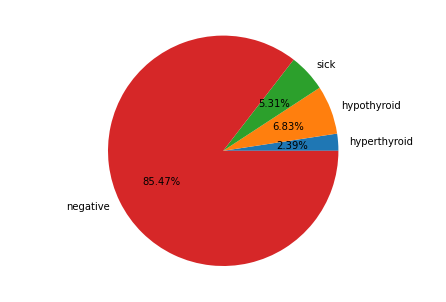

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['hyperthyroid', 'hypothyroid', 'sick','negative']
s = [77,220,171,2753]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [16]:
def convert_category(dataframe, column):
    
    if column == 'Sex':
        conditionF = dataframe[column] == 'F' # For sex column
        conditionT = dataframe[column] == 'M' # For sex column
    else:
        conditionF = dataframe[column] == 'f'
        conditionT = dataframe[column] == 't'
    
    dataframe.loc[conditionF, column] = 0
    dataframe.loc[conditionT, column] = 1

In [17]:
# Binarize Category Columns
binary_cols = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI']

for col in binary_cols: convert_category(thyroid_data, col)

In [18]:
# Convert '?' to np.nan and convert numeric data to numeric dtype
for col in thyroid_data.columns: 
    if col != 'Category':
        thyroid_data.loc[thyroid_data[col] == '?', col] = np.nan
        thyroid_data[col] = pd.to_numeric(thyroid_data[col])

In [19]:
from sklearn.impute import SimpleImputer

curr_columns = thyroid_data.columns.difference(['Category'])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = imputer.fit_transform(thyroid_data.drop('Category', axis=1))
imputed_data = pd.DataFrame(imputed_data, columns=curr_columns)



In [20]:
thyroid_data = pd.concat([
                    imputed_data.reset_index(), 
                    thyroid_data['Category'].reset_index()], 
                    axis=1).drop('index', axis=1)

In [21]:
thyroid_data.dtypes

Age                          float64
FTI                          float64
Goitre                       float64
Hypopituitary                float64
I131 Treatment               float64
Lithium                      float64
On Antithyroid Medication    float64
On Thyroxine                 float64
Pregnant                     float64
Psych                        float64
Query Hyperthyroid           float64
Query Hypothyroid            float64
Query on Thyroxine           float64
Sex                          float64
Sick                         float64
T3                           float64
T4U                          float64
TSH                          float64
TT4                          float64
Thyroid Surgery              float64
Tumor                        float64
Category                      object
dtype: object

In [22]:
thyroid_data.describe()

,Age,FTI,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,Psych,...,Query Hypothyroid,Query on Thyroxine,Sex,Sick,T3,T4U,TSH,TT4,Thyroid Surgery,Tumor
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.406085,0.306116,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,0.004967,0.008382,0.028252,0.000621,0.045948,6.322330,1.951770,107.551630,0.988229,110.261347
std,19.104151,0.460950,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,0.070315,0.091186,0.165718,0.024915,0.209406,26.543102,0.839899,38.091518,0.185982,35.967317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.580000,1.600000,86.000000,0.880000,93.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.900000,102.000000,0.970000,106.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.200000,123.000000,1.070000,123.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,478.000000,10.600000,430.000000,2.120000,395.000000


In [23]:
X = thyroid_data.drop('Category', axis=1)
y = thyroid_data['Category']


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


In [25]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2576, 21) (2576,)
Test set: (645, 21) (645,)


In [26]:
train, test = train_test_split(thyroid_data, test_size = 0.20)
print(train.shape)
print(test.shape)

(2576, 22)
(645, 22)



# Logistic regression

Lets build our model using **LogisticRegression** from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [28]:
yhat1 = LR.predict(X_test)
yhat1

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negati

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):


In [29]:
yhat1_prob = LR.predict_proba(X_test)
yhat1_prob

array([[4.80707165e-02, 4.61419049e-02, 8.66924074e-01, 3.88633049e-02],
       [1.83158310e-02, 3.43445124e-02, 9.43568215e-01, 3.77144135e-03],
       [3.33457744e-02, 7.77790457e-03, 9.52284231e-01, 6.59208989e-03],
       ...,
       [2.78171113e-09, 2.66580753e-01, 5.73483947e-01, 1.59935298e-01],
       [1.83302560e-02, 6.27358715e-02, 8.82623182e-01, 3.63106909e-02],
       [1.44825548e-02, 6.81525980e-02, 8.93230556e-01, 2.41342909e-02]])

In [30]:
from sklearn import metrics

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 0.8372093023255814


In [48]:
print(model.predict([[20,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.5,2.5,200,2,200]]))

['negative']


In [32]:
#Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
thyroidtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
thyroidtree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
thyroidtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
predTree = thyroidtree.predict(X_test)

In [37]:
print (predTree [0:5])
print (y_test [0:5])


['negative' 'negative' 'negative' 'negative' 'negative']
1311    negative
765     negative
853     negative
1190    negative
824     negative
Name: Category, dtype: object


In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8201550387596899


In [39]:
#KNN

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [42]:
yhat2 = neigh.predict(X_test)
yhat2[0:5]

array(['negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

In [43]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))


Train set Accuracy:  0.8645186335403726
Test set Accuracy:  0.7968992248062016


In [44]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7968992248062016


NameError: name 'model1' is not defined